In [43]:
#importing basic packages
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the Data

In [44]:
#Loading the data
data = pd.read_csv('data/combined_data.csv')
data.head()

,Domain,IP,@,URL Length,URL Depth,Redirection,https Domain,TinyURL,Prefix/Suffix,IP Present,HTTPS Token,Protocol Count,Protocol,Special Character Count,DNS Record,Web Traffic,Domain Age,Label
0,1337x.to,0,0,1,3,0,0,0,0,0,1,1,1,0,0,0,0,0
1,1337x.to,0,0,1,3,0,0,0,0,0,1,1,1,0,0,0,0,0
2,1337x.to,0,0,1,3,0,0,0,0,0,1,1,1,0,0,0,0,0
3,1337x.to,0,0,1,3,0,0,0,0,0,1,1,1,0,0,0,0,0
4,1337x.to,0,0,1,3,0,0,0,0,0,1,1,1,0,0,0,0,0


In [45]:
data.shape

(50235, 18)

In [46]:
#Listing the features of the dataset
data.columns

Index(['Domain', 'IP', '@', 'URL Length', 'URL Depth', 'Redirection',
       'https Domain', 'TinyURL', 'Prefix/Suffix', 'IP Present', 'HTTPS Token',
       'Protocol Count', 'Protocol', 'Special Character Count', 'DNS Record',
       'Web Traffic', 'Domain Age', 'Label'],
      dtype='object')

In [47]:
#Information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50235 entries, 0 to 50234
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Domain                   50235 non-null  object
 1   IP                       50235 non-null  int64 
 2   @                        50235 non-null  int64 
 3   URL Length               50235 non-null  int64 
 4   URL Depth                50235 non-null  int64 
 5   Redirection              50235 non-null  int64 
 6   https Domain             50235 non-null  int64 
 7   TinyURL                  50235 non-null  int64 
 8   Prefix/Suffix            50235 non-null  int64 
 9   IP Present               50235 non-null  int64 
 10  HTTPS Token              50235 non-null  int64 
 11  Protocol Count           50235 non-null  int64 
 12  Protocol                 50235 non-null  int64 
 13  Special Character Count  50235 non-null  int64 
 14  DNS Record               50235 non-nul

# Visualization of the data

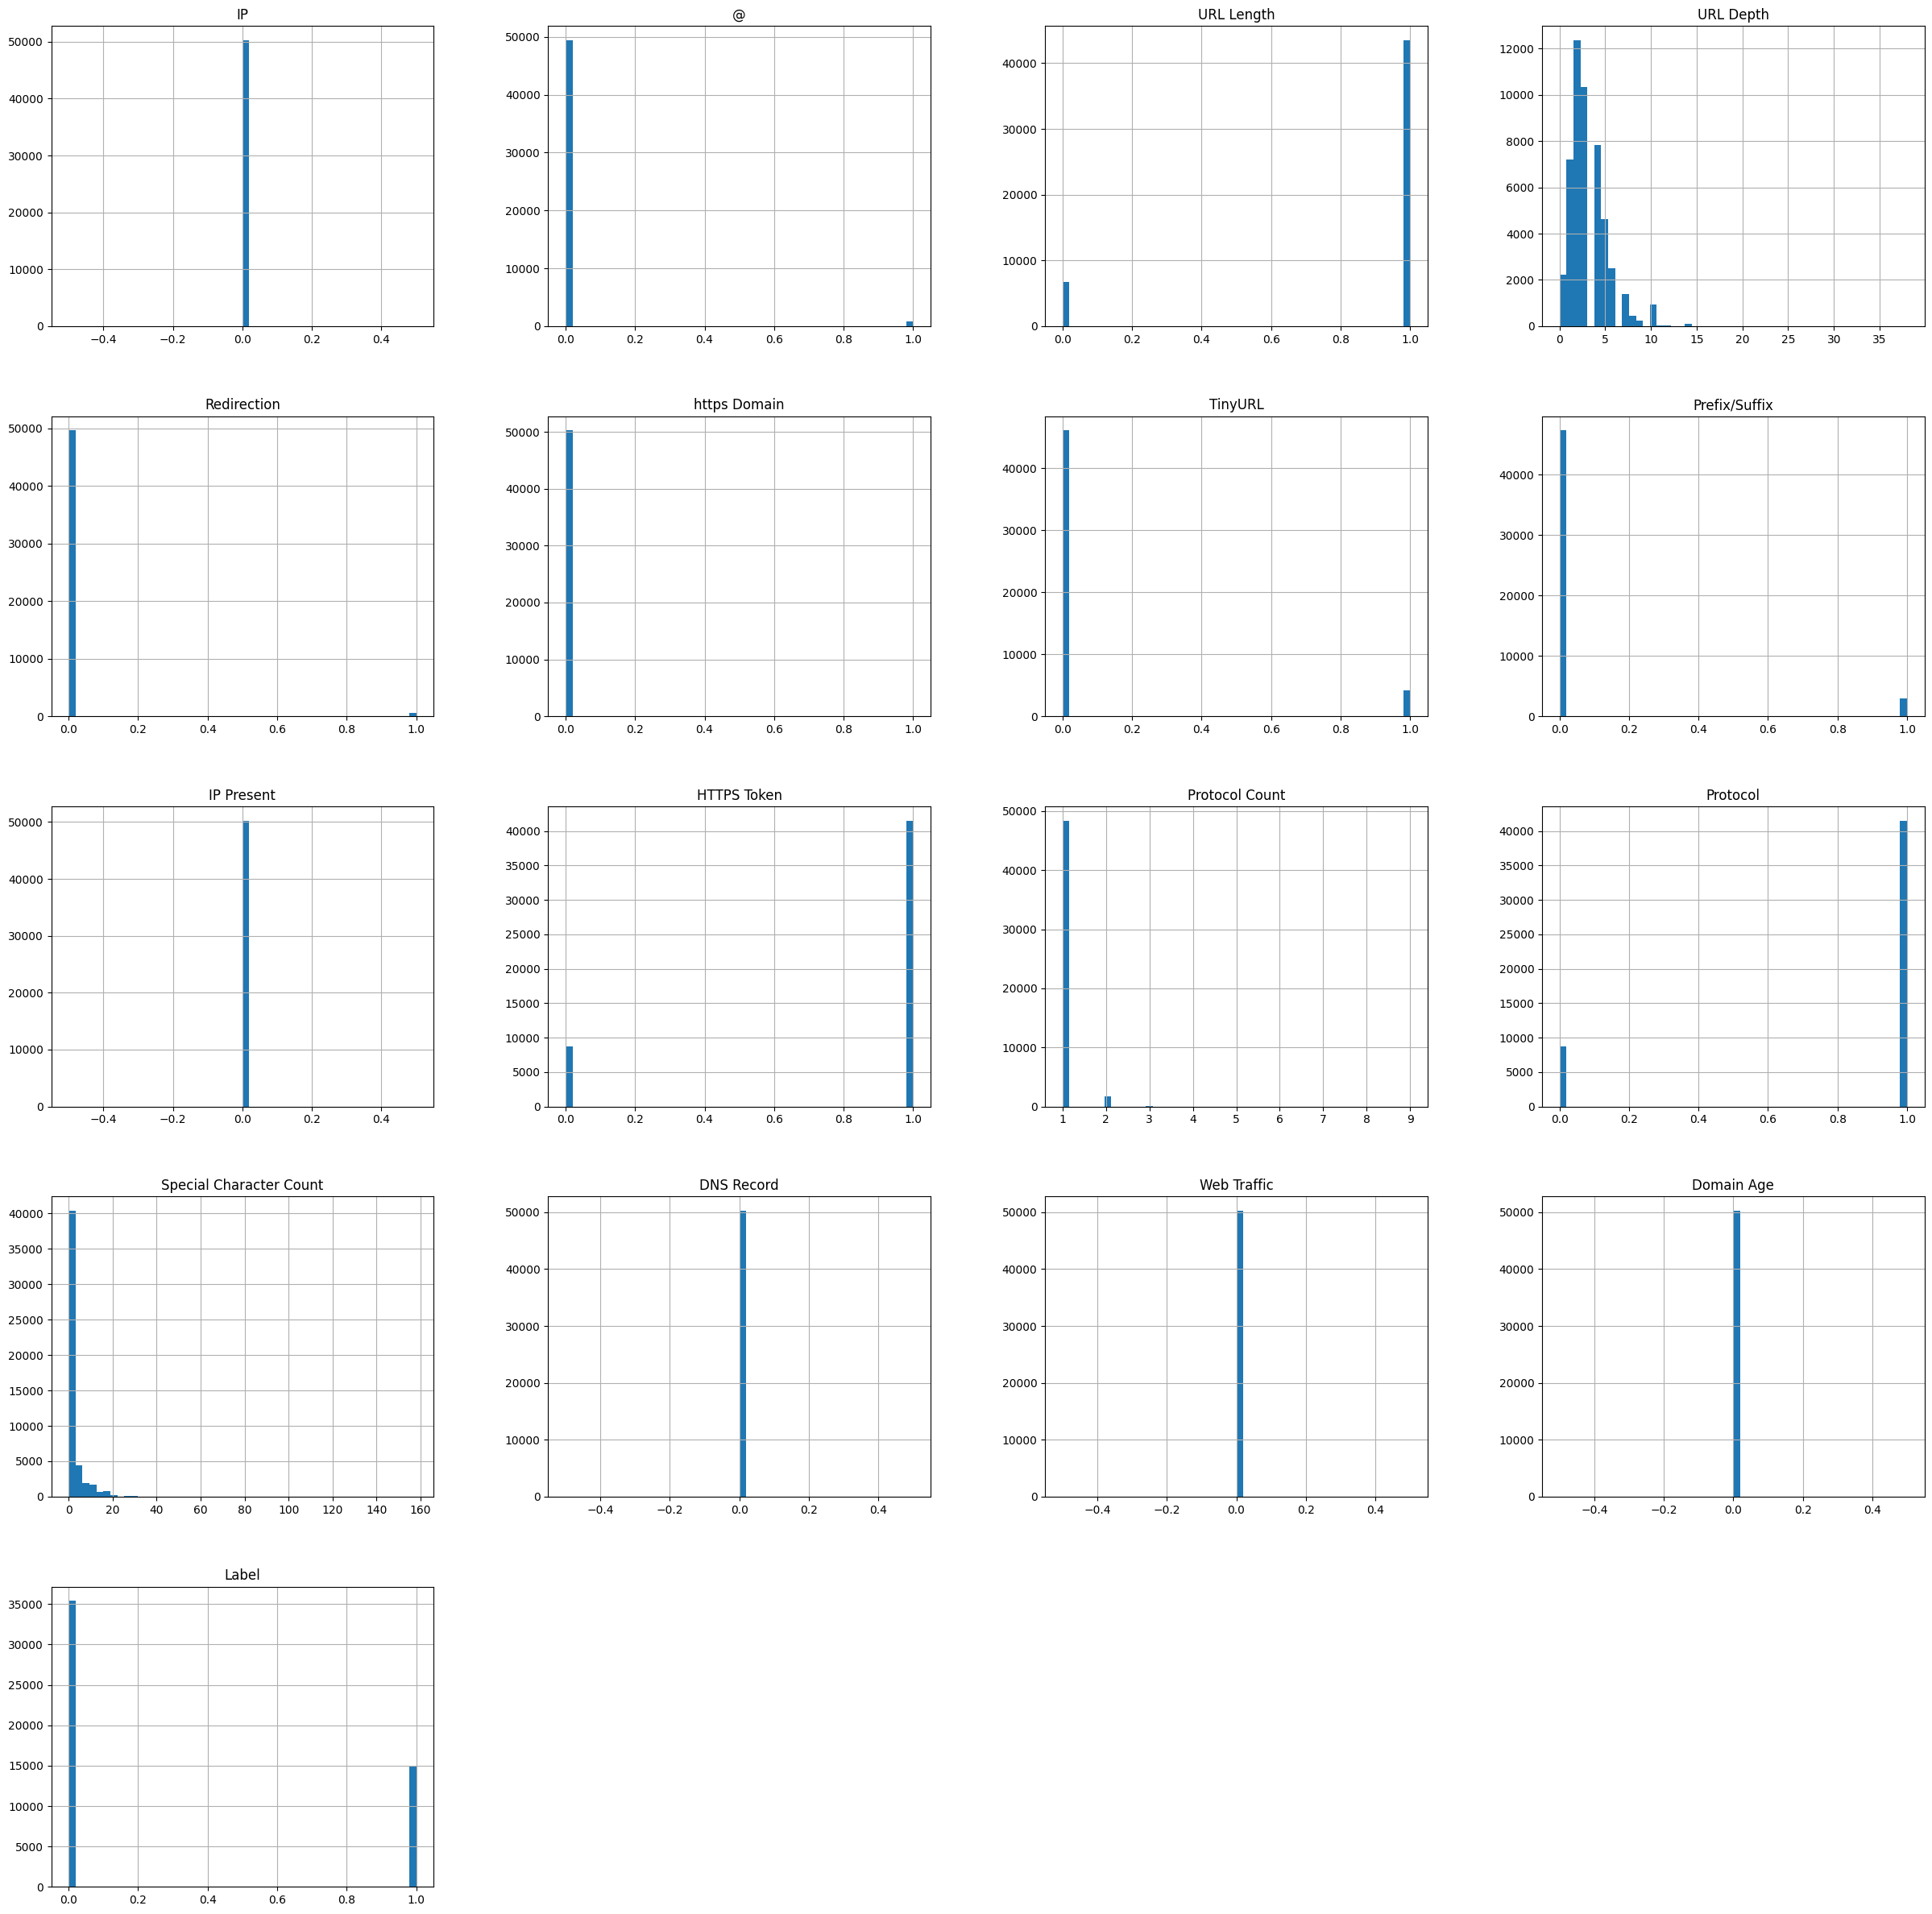

In [48]:
#Plotting the data distribution
data.hist(bins = 50,figsize = (30,30))
plt.show()

/var/folders/_l/t12f6mln5wndxq1mdcqsv5vc0000gn/T/ipykernel_13630/3558350551.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


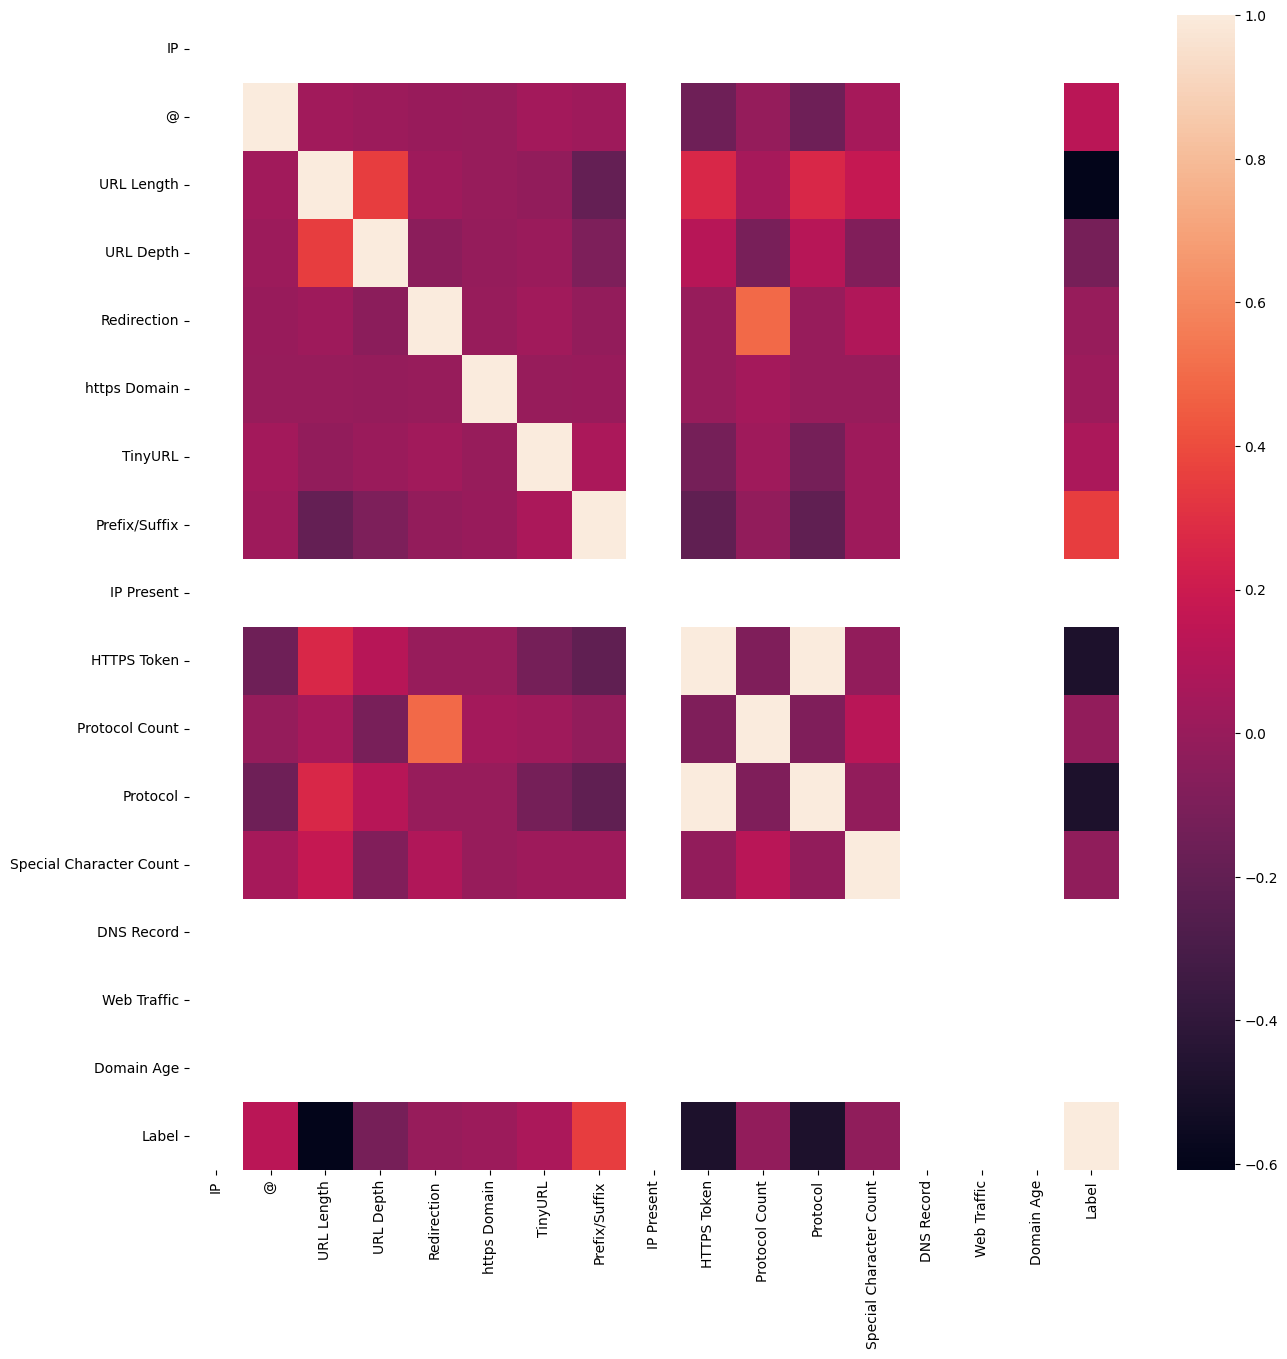

In [49]:
#Correlation heatmap
plt.figure(figsize=(15,15))
sns.heatmap(data.corr())
plt.show()

# Data pre processing and EDA

In [50]:
data.describe()

,IP,@,URL Length,URL Depth,Redirection,https Domain,TinyURL,Prefix/Suffix,IP Present,HTTPS Token,Protocol Count,Protocol,Special Character Count,DNS Record,Web Traffic,Domain Age,Label
count,50235.0,50235.000000,50235.000000,50235.000000,50235.000000,50235.000000,50235.000000,50235.000000,50235.0,50235.000000,50235.000000,50235.000000,50235.000000,50235.0,50235.0,50235.0,50235.000000
mean,0.0,0.016144,0.865373,3.170339,0.012461,0.000119,0.082691,0.058505,0.0,0.826157,1.040311,0.826157,2.047477,0.0,0.0,0.0,0.295770
std,0.0,0.126031,0.341328,2.081067,0.110934,0.010928,0.275418,0.234698,0.0,0.378978,0.226071,0.378978,4.342270,0.0,0.0,0.0,0.456393
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
25%,0.0,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000
50%,0.0,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000
75%,0.0,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,1.000000,2.000000,0.0,0.0,0.0,1.000000
max,0.0,1.000000,1.000000,38.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,9.000000,1.000000,158.000000,0.0,0.0,0.0,1.000000


url depth
special character count
hostname

In [51]:
#Dropping the Domain column
data = data.drop(['Domain'], axis = 1).copy()

In [52]:
#checking the data for null or missing values
data.isnull().sum()

IP                         0
@                          0
URL Length                 0
URL Depth                  0
Redirection                0
https Domain               0
TinyURL                    0
Prefix/Suffix              0
IP Present                 0
HTTPS Token                0
Protocol Count             0
Protocol                   0
Special Character Count    0
DNS Record                 0
Web Traffic                0
Domain Age                 0
Label                      0
dtype: int64

In [53]:
data.shape

(50235, 17)

In [54]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,IP,@,URL Length,URL Depth,Redirection,https Domain,TinyURL,Prefix/Suffix,IP Present,HTTPS Token,Protocol Count,Protocol,Special Character Count,DNS Record,Web Traffic,Domain Age,Label
0,0,0,1,4,0,0,0,0,0,1,1,1,0,0,0,0,0
1,0,0,1,1,0,0,1,0,0,0,4,0,2,0,0,0,0
2,0,0,1,2,0,0,0,0,0,1,1,1,0,0,0,0,0
3,0,0,1,3,0,0,0,0,0,1,1,1,2,0,0,0,1
4,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1


# Splitting the data

In [62]:
# Sepratating & assigning features and target columns to X & y
y = data['Label']
x = data.drop('Label',axis=1)
x.shape, y.shape

((50235, 16), (50235,))

In [63]:
# Splitting the dataset into train and test sets: 70-30 split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 12)
x_train.shape, x_test.shape

((35164, 16), (15071, 16))

# BULK TRAINING AND TESTING

In [64]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier #Decision Tree model 
from sklearn.ensemble import RandomForestClassifier #Random Forest model
from sklearn.neural_network import MLPClassifier #Multilayer Perceptrons model
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

# BULK TRAINING

In [66]:
models = [DecisionTreeClassifier(),RandomForestClassifier(), MLPClassifier(), SVC(), LogisticRegression(),GradientBoostingClassifier(),AdaBoostClassifier()]
for model in models:
    model.fit(x_train,y_train)
    print(str(model) , ' -  ->train_accuracy: ' ,model.score(x_train,y_train))

DecisionTreeClassifier()  -  ->train_accuracy:  0.9274826527130019
RandomForestClassifier()  -  ->train_accuracy:  0.9274826527130019


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()  -  ->train_accuracy:  0.9183824365828689
SVC()  -  ->train_accuracy:  0.9070356045956092


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()  -  ->train_accuracy:  0.8919064952792629
GradientBoostingClassifier()  -  ->train_accuracy:  0.9124388579228757
AdaBoostClassifier()  -  ->train_accuracy:  0.8946081219428962


# BULK TESTING

In [69]:
models = [DecisionTreeClassifier(),RandomForestClassifier(), MLPClassifier(), SVC(), LogisticRegression(),GradientBoostingClassifier(),AdaBoostClassifier()]
for model in models:
    model.fit(x_train,y_train)
    print(str(model) , ' -  ->test_accuracy: ' ,model.score(x_test,y_test))

DecisionTreeClassifier()  -  ->test_accuracy:  0.9258177957667043
RandomForestClassifier()  -  ->test_accuracy:  0.9276093159047176


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()  -  ->test_accuracy:  0.9208413509388893
SVC()  -  ->test_accuracy:  0.9125472762258643


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()  -  ->test_accuracy:  0.896224537190631
GradientBoostingClassifier()  -  ->test_accuracy:  0.9171919580651583
AdaBoostClassifier()  -  ->test_accuracy:  0.8984805255125738


In [91]:
forest = RandomForestClassifier()
forest.fit(x_train, y_train)

RandomForestClassifier()

In [92]:
# save Random Forest model to file
import pickle
pickle.dump(forest, open("RandomForestClassifier.pickle.dat", "wb"))

In [93]:
# load model from file
loaded_model = pickle.load(open("RandomForestClassifier.pickle.dat", "rb"))
loaded_model

RandomForestClassifier()

In [94]:
with open('classifier_model.pkl','wb') as f:
    pickle.dump(forest,f)